In [299]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import binom, poisson, norm

sns.set_style("whitegrid")

# Probability
## Permutations

A permutation of a set of objects is an arrangement of the objects in a certain order.
The possible permutations of a, b and c is:

$$abc = 3 items$$
$$n! = 3! = 3 x 2 x 1$$

You can take a subset  of items in a permutation

The number of permutations of a set of $n$ objects take $r$ at a time is given by the following formula:
$$ _nP_r=\frac{n!}{(n-r)!}$$

__Example__
A website requires a 4 character password.  Characters can either be lowercase letters or the digits 0-9.  You may not repeat a letter or number.  How many different possible passwords can there be?

$n$ = total number of objects or 26 letters + 10 numbers = 36

$r$ = the number of objects taken at one time

$$ _36P_4=\frac{36!}{(36-4)!} = \frac{36 x 35x 34 33 x 32 x 31..}{32 x 31..}$$

After eliminating similar numerator from 32 down you are left with:

$$36 x 35 x 34 x 33 = 1,413,720 permutations$$

__Note:__ Keep in mind the above is without repetitions.

In [27]:
# Permutations without repetition
letters = 26
numbers = 10 

# function to calculate permutations
def calculate_permutations(n, r, repetitions=False):
    if repetitions == False:
        permutations = math.factorial(n)/math.factorial(n - r)
    elif repetitions == True:
        permutations = n**r
    return permutations

permutations = calculate_permutations(n=(letters + numbers), r=4, repetitions=False)

print(f"Total permutations without repetition: {permutations:,.2f}")

Total permutations without repetition: 1,413,720.00


__Example__ How many 4 digit license plates can you make using the number 0 to 9 while allowing repetition?

The number of arrangements of $n$ objects taken $r$ at a time, with repetition is given by.
$$n^r$$

Recognize 10 objects taken 4 at a time
$$n^r = 10^4 = 10,000$$

In [28]:
# Permutations with repetition
permutations = calculate_permutations(n=10, r=4, repetitions=True)

print(f"Total permutations with repetition: {permutations:,.2f}")

Total permutations with repetition: 10,000.00


## Combinations
- Unordered arrangements of objects are called __combinations__
- A group of people selected for a team are the same group, no matter the order
- A pizza that is half tomato, half spinach is the same as one half spinach, half tomato

The number of combinations of a set of $n$ objects take $r$ at a time is given by:

$$_nC_r=\frac{n!}{r!(n-r)!}$$

How many 3-letter combinations can be made from the letters of ABCDE?

First total number of permutations:

$$_5P_3=\frac{5!}{(5-3)!} = 5 * 4 * 3 = 60$$

Next the total combinations which doesn't regard the various order:

$$_nC_r=\frac{n!}{r!(n-r)!} = \frac{5!}{3!*2!}$$

3 combinations

In [30]:
# function to calculate combinations
def calculate_combinations(n, r):
    r_fact = math.factorial(r)
    n_r = n-r
    comb = math.factorial(n)/(r_fact*math.factorial(n_r))
    return comb

In [31]:
combinations = calculate_combinations(5,3)
print(f"Total number of combinations: {combinations:,.2f}")

Total number of combinations: 10.00


__Exercise__ For a study, 4 people are chose at random from a group of 10 people.  How many ways can this be done?

Since there is the same group of people no matter the order they're chosen, you can set up the problem as a combination:

$$_nC_r = \frac{n!}{r!(n-r)!}= \frac{10!}{4!(10-4)!}=210$$

In [32]:
combinations = calculate_combinations(10,4)
print(f"Total number of combinations: {combinations:,.2f}")

Total number of combinations: 210.00


__Exercise__ For a pizza, 4 ingredients are chosen from a total of 10 ingredients. How many different combinations of pizza can we have? (you can only use each ingredient once)

The solution is the same as before, because there are 10 total ingredients.

$$_nC_r = \frac{n!}{r!(n-r)!}= \frac{10!}{4!(10-4)!}=210$$

Now what if you are able to repeat ingredients? (Use pepperoni 3 times and then add tomato once)

__Combination with Repetitions__
The number of combinations taken $r$ at a time from a set $n$ and allowing for repetition:

$$_n + _r-_1C_r = \frac{n + r - 1!}{r!(n-1)!} = \frac{13!}{4!(9!)} = 715$$

In [42]:
# function with repetition and without
def calculate_combinations(n, r, repetitions=True):
    r_fact = math.factorial(r)
    n_r = n-r
    if repetitions == False:
        comb = math.factorial(n)/(r_fact*math.factorial(n_r))
    elif repetitions == True:
        comb = math.factorial(n+r-1)/(r_fact*math.factorial(n-1))
    return comb

In [43]:
calculate_combinations(n=10, r=4, repetitions=True)

715.0

### Formulas

__Permutations - No Repetition__
$$ _nP_r=\frac{n!}{(n-r)!}$$
Excel = PERMUT(n,r)


__Combinations - No Repetition__
$$_nC_r=\frac{n!}{r!(n-r)!}$$
Excel = COMBIN(n,r)

__Permutations - With Repetition__
$$n^r$$
Excel = PERMUTATIONA(n,r)

__Combinations - With Repetition__
$$_nC_r = \frac{n!}{r!(n-r)!}$$
Excel = COMBINA(n,r)

## Intersections, Unions and Complements

### Intersections
If we assign A as the event of red balls and B as the event of striped balls, the intersection of A and B is given as:
$$A\cap B = B\cap A$$

Order does not matter.

The probability of A and B is given as:
$$P(A\cap B)$$

Total of 3 balls overlapping and an overall total of 15 balls
$$P(A\cap B) = \frac{3}{15} = 0.2$$

The odds of getting a red a red-striped ball is .20 or 20%

### Unions
The union of two events considers if A or B occurs, and is given as:

$$(A\cup B) = (B\cup A)$$

The probability of A or B is given as:
$$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

In this case:
the $P(A)$ is getting a red ball 9 and the $P(B)$ is getting a striped ball 15

$$P(A\cap B) = \frac{9}{15}+\frac{9}{15}-\frac{3}{15}=\frac{15}{15}=1$$

### Complements
The complement of an event considers everything outside of the event, given by: $\bar{A}$

The probability of not A is:

$$ P\bar{(A)} = 1 - P(A) = \frac{15}{15} - \frac{9}{15} = \frac{6}{15} = 0.4 $$

## Independent Events
- An independent series of events occur when the outcome of one event has no effect on the outcome of another.
- An example is flipping a fair coin twice

The probability of seeing two heads with two flips of a fair coin is:

$$P(H_1 H_2) = P(H_1) * P(H_2) = \frac{1}{2} * \frac{1}{2} = \frac{1}{4}$$

## Dependent Events
- A dependent event occurs when the outcome of a first event __does__ affect the probability of a second event.
- A common example is to draw colored marbles from a bag __without replacement__

__Example__
- Imagine a bag contains 2 blue marbles and 3 red marbles
- If you take 2 marbles out of the bag, what is the probability that they are both red?

_Step 1:_ The probability of drawing a first red marble:
$$P(R_1) = \frac{3}{5}$$

_Step 2:_ The probabilty of drawing a second red marble _given that_ the first marble was red is written as:
$$P(R_2|R_1) = \frac{2}{4}$$

The sample set now becomes 2 red and 2 blue

So the probabilty of two red marbles is:
$$P(R_1 \cap R_2) = P(R_1) * P(R_2|R_1)$$

$$\frac{3}{5} * \frac{2}{4} = \frac{6}{20} = 0.3$$

## Conditional Probability
- The idea that we want to know the probability of event A, givent that event B has occurred, is conditional probability.
- This is written as: $P(A|B)$

- Going back to dependent events the probabilty of drawing two red marbles is (no replacement):
$$P(R_1 \cap R_2) = P(R_1) * P(R_2|R_1)$$

- The conditional in theis equation is:
$$P(R_2|R_1)$$

- Rearranging the formula gives:
$$P(A|B) = \frac{P(A\cap B}{P(B)}$$

That is the probability of A given B equals the probability of A and B divided by the probability of B

__Example__
A company finds that out of every 100 projects, 48 are completed on time, 62 are completed under budget, and 16 are completed __both__ on time and under budget.
- Given that a project is completed on time, what is the probability that it is under budget?

$$P(A|B) = \frac{P(A\cap B}{P(B)} = \frac{16}{48} = 0.33 $$

both = 16 and on time = 48

### Addition & Multiplication Rules
- From the previous example, what is the probability of a project completing on time __or__ under budget?

$P(A\cup B) = P(A) + P(B) - P(A\cap B) = \frac{48}{100} + \frac{62}{100} - \frac{16}{100}$

$= 0.48 + 0.62 - 0.16$

$= 0.94$

This is the addition rule

#### Addition Rule for Mutually Exclusive Events
- When two events cannot both happen, they are said to be __mutually exclusive__.  No overlap.
- 32 Employees have chosen 'Plan A' and 56 employees have chosen 'Plan B' - they can only choose one or the other

- in this case the addition rule becomes:
$$P(A\cup B) = P(A) + P(B)$$

#### Multiplication Rule
- From the section on dependent events we saw that the probability of A and B is:
$$P(A\cap B) = P(A) * P(B|A)$$

- This is known as the __multiplication rule__

__Excercise__
Given a standard deck of 52 cards, what is the probability of drawing 4 aces? (each letter essentially represents an ace i.e. ace of hearts)

$$P(A\cap B \cap C \cap D) = P(A)*P(B|A)*P(C|AB)*P(D|ABC)$$

$$=\frac{4}{52} * \frac{3}{51} * \frac{2}{50} * \frac{1}{49} = \frac{24}{6,497,400} =\frac{1}{270,725}$$

In [88]:
def multiplication_rule(aces, cards):
    ace_fact = math.factorial(aces)
    cards_fact = np.prod(np.arange((cards+1-aces), (cards+1), 1))
    gcd = np.gcd(ace_fact, cards_fact)
    print(f"The probability of drawing {aces} aces in a deck of {cards} cards is {int(ace_fact/gcd)}/{int(cards_fact/gcd):,.0f}")
    
multiplication_rule(4,52)

The probability of drawing 4 aces in a deck of 52 cards is 1/270,725


## Bayes Theorem

- We've already seen conditional probability
$$P(A|B) = \frac{P(A\cap B}{P(B)} = provided P(B) > 0$$
$$P(B|A) = \frac{P(B\cap A}{P(A)} = \frac{P(A\cap B}{A} = provided P(A) >0$$

Has to be above zero otherwise no probability

- We can then connect the two conditional probability formulas to get Baye's Theorem

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)} provided P(A), P(B) > 0$$

- Baye's Theorem is used to determine the probability of a parameter, given a certain event.
- The general formula is the following:
$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

__Exercise__

- A company learns that 1 out of 500 of their products are defective, or 0.2%
- The company busy a diagnostic tool that correctly identifies a defective part 99% of the time.
- If a part is diagnosed as defective, what is the probability that it really is defective?

$P(A|B)$ = probability of being defective if testing positive = ?

$P(B|A)$ = probability of testing positive if defective = 0.99

$P(A)$ = probability of being defective = 0.002 or 1/500

$P(B)$ = probability of testing positive = Need to calculate this

_Note:_
- True positive = Product is defective and gets classified as defective
- False positive = Product is __not__ defective but still gets classified as defective


__Calculate__
$P(B)$ = probability of testing positive

= P(true positive) + P(false positive)

$=P(B|A) * P(A) + P(B|-A) * P(-A)$

Probability of Not Testing Positive
$=P(B|-A) = 1 - P(B|A) = 1 - 0.99 = 0.01$

Probability of Not being defective
$=P(-A) = 1 - P(A) = 1 - 0.002 = 0.998$

Final formula is
$$P(A|B) = \frac{P(B|A*P(A)}{P(B|A)*P(A)+P(B|-A)*P(-A)}$$

$$=\frac{0.99 * 0.002}{0.99 * 0.002 + 0.01 * 0.998}$$

$$=0.165$$

__Answer__ Therefore a positive test has a 16.5% chance of correctly identifying a defective part.

What if we perform a second test, and that also comes up positive?
We would replace A

$$P(A|B) = \frac{P(B|A*P(A)}{P(B|A)*P(A)+P(B|-A)*P(-A)}$$

$$=\frac{0.99 * 0.165}{0.99 * 0.165 + 0.01 * 0.835}$$

$$=0.951$$

__Answer__ Two positive tests give us a 95.1% probability that the part is defective.

# Distributions
- Describes all the probable outcomes of a variable.
- In a discrete distribution, the sum of all the individual probabilities must equal 1
- In a continuous distribution the area under the probability curve equals 1

## Discrete Distributions
Discrete probability distributions are also called _probability mass functions__

1. Uniform Distribution
2. Binomial Distribution
3. Poisson Distribution

### Uniform Distribution
- rollling a fair die has 6 discrete, equally probable outcomes
- You can roll a 1 or a 2, but not a 1.5

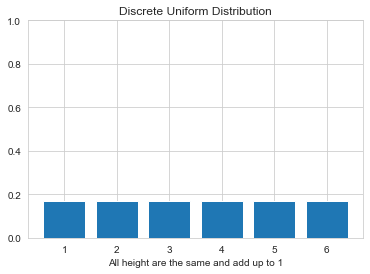

In [101]:
plt.bar(x=[1,2,3,4,5,6], height=[0.167,0.167,0.167,0.167,0.167,0.167])
plt.ylim([0,1])
plt.title("Discrete Uniform Distribution")
plt.xlabel("All height are the same and add up to 1");

### Binomial Distribution
- Binomial means there are two discrete mutually exclusive outcomes of a trial.
- i.e. heads or tails, on or off, success or failure

__Bernoulli Trial__
A Bernoulli Trial is a random experiment in which there are only two possible outcomes
- success or failure
- A series of trials $n$ will follow a binary distribution so long as:
A) the probability of success $p$ is constant
B) trials are independent of one another

#### Binomial Probability Mass Function
- Gives the probability of observing $x$ successes in $n$ trials
- The probability of success on a single trial is denoted by $p$
- Assumes that $p$ is fixed for all trials

$$P(x:n:p) = \left(^n _x \right)(p)^x(1-p)^{(n-x)}$$

indicates the probability of $x$ number successes in $n$ number of trials - $p$ is probability

In [251]:
# Plot Binomial distribution
def plot_binomial_distribution(n, p):
    mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
    
    x = np.arange(0,n,1)
    
    df = pd.DataFrame({'successes':x,
                       'probability':binom.pmf(x, n, p)})

    fig = px.bar(data_frame=df, x='successes', y='probability', title=f"Binomial Distribution n={n} and p={p:.3f}",
                 template="plotly_white", width=600, height=400)
    fig.show()

In [252]:
# Plot 50 coins the probability of getting heads (or tails)
plot_binomial_distribution(n=50, p=0.5)

In [253]:
# Rolling a dice 50 times and rolling a number
plot_binomial_distribution(n=50, p=1/6)

__Excercise__ If you roll a die 16 times, what is the probability that 5 comes up 3 times?
- based on the chart it would be just shy of 0.25

$$x = 3, n = 16, p = 1/6$$

$$P(x:n:p) = \left(^n _x \right)(p)^x(1-p)^{(n-x)}$$

Expanded
$$P(x:n:p) = \frac{n!}{x!(n-x)!}(p)^x(1-p)^{(n-x)}$$

$$P(x:n:p) = \frac{16!}{3!(13)!}(1/6)^3(5/6)^{(13)}$$

$$P(x:n:p) = \frac{16*15*14}{3*2}(\frac{1^3}{6^3})(\frac{5^13}{6^13}) = 0.242$$

__Excel__
= BINOM.DIST(3,16,1/6, FALSE)
False means it has to be exact match

```python
from scipy.stats import binom
binom.pmf(3, 16, 1/6)
```

In [254]:
# Binomial Calculator
x = 3    # number of successes
n = 16   # number of trials
p = 1/6  # probability

binom.pmf(x, n, p)

0.2423137603371325

#### Poisson Distribution
- a binomial distribution consiers the number of successes out of $n$ trials
- A Poisson Distribution considers the number of successes _per unit of time_ over the course of many units
- or any other continuous unit e.g _distance_

##### Probability Mass Function
- Calculation of the Poisson probability mass function starts with a mean expected value
$$E(X) = \mu$$

- it is then assigned to "lambda"

$$\lambda = \frac{no. of occurrences}{interval} = \mu$$

i.e. number of cars passing by for every hour - here you can do any continuous unit i.e. 1.5, 2.3

- The equation becomes

$$P(x) = \frac {\lambda^{x}e^{-\lambda}}{x!}$$

where _e_ = Euler's number = 2.71828

__Excercise__
- A warehouse typically receives 8 (average) deliveries between 4 and 5pm on Friday.
- What is the probability that only 4 deliveries will arrive between 4 and 5pm on Friday?

$$x = 4, \lambda = 8$$

$$P(x) = \frac {\lambda^{x}e^{-\lambda}}{x!} =  \frac {8^{4}2.71828^{-8}}{4!}$$

$$=  \frac {4096*(\frac {1}{2980.96})}{24}$$

$$=  0.0572$$

__Excel__
=POISSON.DIST(4,8,FALSE) returns 0.057252

__Python__
```python
pass x and lambda values
poisson.pmf(4,8)
0.05252288
```


##### Cumulative Mass Function
- The cumulative mass function is simply the sum of all the discrete probabilities
- The probability of seeing __fewer__ than 4 events in a Poisson Distribution is:

$$P(X:x<4)=\sum_{i=0}^{3} \frac {\lambda^{i}e^{-\lambda}}{i!}$$

Just sum up all of the probabilities of seeing 1, 2, 3, 4

$$P(X:x<4)=\frac {\lambda^{i}e^{-\lambda}}{0!} + \frac {\lambda^{i}e^{-\lambda}}{1!} + \frac {\lambda^{i}e^{-\lambda}}{2!} + \frac {\lambda^{i}e^{-\lambda}}{3!}$$


__Remember__ that the sum of all possibiilities equals 1 - This is the probability of seeing at least 1 event.
- the probability of seeing at least 1 event is one minus the probability of seeing 0

$$P(X:x\ge 1) = 1-P(X:x=0)$$

$$P(X:x\ge 1) = 1-\frac {\lambda^{0}e^{-\lambda}}{0!} = 1 - e^{-\lambda}$$


__Exercise__
- A warehouse typically receives 8 deliveries between 4 and 5pm on Friday
- What is the probability that fewer than 3 will arrive between 4 and 5pm this Friday?

$$P(X:x<3)=\sum_{i=0}^{2} \frac {\lambda^{i}e^{-\lambda}}{i!} \frac {\lambda^{i}e^{-\lambda}}{0!} + \frac {\lambda^{i}e^{-\lambda}}{1!} + \frac {\lambda^{i}e^{-\lambda}}{2!}$$

$$P(X:x<3)=\sum_{i=0}^{2} \frac {8^{0}2.71828^{-8}}{0!} + \frac {8^{1}2.71828^{-8}}{1!} + \frac {8^{2}2.71828^{-8}}{2!} + \frac {8^{3}2.71828^{-8}}{3!} $$

$$P(X:x<3)=\frac{1\frac{1}{2980.92}}{1} + \frac{8\frac{1}{2980.92}}{1} + \frac{64\frac{1}{2980.92}}{2}$$

$$= 0.0137$$

__Excel__

3-1 = 2

=POISSON.DIST(2,8,TRUE) returns 0.013754

__Python__

```python
# Note Cumulative Density Function
poisson.cdf(2,8)
0.013
```


__Important__
The Poisson Distribution assumes that the probability of success during a small time interval is proportional to the entire length of the interval.
- If you know the expected value $\lambda$ over an hour, then the expected value over one minute of the that hour is 

$$\lambda_{minute} = \frac{\lambda_{hour}}{60}$$

The actual probability of success does not change for that time period and happen regularly.  If they are uneven then Poisson will not apply.

__Exercise__
- A warehouse typically receives 8 deliveries between 4 and 5pm on Friday.
- What is the probability that no deliveries arrive between 4 and 4:05pm this Friday?
- this will work for any 5 minute interval of time regardless of when (i.e.4:55 and 5)

$$x=0, \lambda_{1 hour}=8$$

$$\lambda_{5 minutes} = \frac{\lambda_{1 hour}}{60/5} = \frac{8}{12} = 0.6667$$

$$P(x) = \frac{\lambda_ x e^{-\lambda}}{x!} = \frac{0.67^0*2.71828^{0.6667}}{0!}$$

$$= 0.5134$$

__Excel__
=POISSON.DIST(0,8/12, FALSE) returns 0.513417

__Python__
```python
from scipy.stats import poisson
# expected value
x = 0
# time interval
lmbda = 0.6667

poisson.pmf(x, lmbda)
= 0.5134
```

# Continuous Probability Distributions
Continuous Probability Distributions are also called _probability density functions_:
1. Normal Distribution
2. Exponential Distribution
3. Beta Distribution

### Normal Distributions
Many real life data points follow a normal distribution:
- people heights and weights
- population blood pressure
- test scores
- measurement errors

These data sources tend to be around a central value with no bias left or right and it gets close to a "Normal Distribution" like this:
[Normal Distribution Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Standard_deviation_diagram.svg)

- We can use a continuous distribution to model the behaviour of these data sources
- Notice the continuous line and area in this PDF.
- Unlike discrete distributions, where the sum of all the bars equals one, in a normal distribution the _area under the curve_ equals one
- Also called a "Bell Curve" or a "Gaussian Distribution"
- always symmetrical
- probabilty of a specific outcome is zero


We can only find probabilities over a specified interval or range of outcomes

##### Z Distribution
$$\mu = 0$$
$$\sigma = 1$$

##### Standard Normal Distribution
__68.27%__ of values within 1 standard deviation

__95.45%__ of values within 2 standard deviations

__99.73%__ of values within 3 standard deviations


- The mean odes not have to be zero and sigma does not have to equal one
- If we determine that a population approximates a normal distribution then we can make some powerful inferences about it onces we know the mean and standard deviation.

In [377]:
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = norm.cdf(x, mu, sigma)
    else:
        y = norm.pdf(x, mu, sigma)
           
#     plt.plot(x, y, **kwargs)
    df = pd.DataFrame({'x':x,
                       'y':y})

    fig = px.area(data_frame=df, x='x', y='y', title=f"Normal Distribution mu={mu} and sigma={sigma}",
                 template="plotly_white", width=600, height=400,)
        
    fig.show()

In [378]:
# Normal CDF or PMF
x = np.linspace(-5, 5, 1000)
plot_normal(x_range=x, cdf=False, mu=0, sigma=1)

#### Normal Distribution Formulas and Z-scores
- in the statistics section of the course, we will be using sampling, standard error and hypothesis testing to evaluate experiments.
- A large part of this process is understanding how to "standardize" a normal distribution
- we can take any normal distribution and standardize it to a standard normal distribution

__Formula__

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Where:

$\mu = mean$

$\sigma = standard deviation$

$e = 2.71828$

$\pi = 3.14159$

##### Z-Scores and Z-Table
To gain insight about a specific value $x$ in other normal populations, we _standardize_ $x$ by calculating a z-score:

$$Z = \frac{x-\mu}{\sigma}$$

We can then determine a x's percentile by looking at the z-table

A Z-table of Standard Normal Probabilities maps a particular z-score to the area under a normal distribution curve o the left of the score.

- Different tables serve different purposes

__Excel__

In Excel the following functions return z-scores and probabilities:

In [368]:
pd.DataFrame({'Input':['z', 'p'],
              'Input Value':[0.70,0.95],
              'Formula':['=NORMSDIST(B2)', "=NORMSINV(B3)"],
              'Output': ['p', 'z'],
              'Output Value': [0.758036, 1.644854]})

,Input,Input Value,Formula,Output,Output Value
0,z,0.70,=NORMSDIST(B2),p,0.758036
1,p,0.95,=NORMSINV(B3),z,1.644854


__Python__

```python
from scipy import stats
z = 0.70

# i.e. This is my score what's my percentile?
stats.norm.cdf(z)
0.758036

# i.e. what's the minimum score needed to meet 95 percentile?
p = 0.95
stats.norm.ppf(p)
1.6448536
```

__Exercise__

- A company is looking to hire a new database administrator
- They give a standardized test to applicants to measure their technical knowledge
- The first applicant, Amy, scores an 87
- Based on her score is Amy exceptionally qualified?

- To decide howe well an applicant scored, we need to understand the population.
- Based on thousands of previous tests we know that the mean score is 75 out of 100, with a standard deviation of 7 points.

1. First convert Amy's score to a standardized z-score using the formula?
$$z = \frac{x-\mu}{\sigma}$$

$$z = \frac{87-75}{7} = 1.7143$$

```python
# Review a z-table or use scipy stats
stats.norm.cdf(1.71)
0.95636
```

- This represents the area to the left of Amy's score
- This means that Amy outscored 95.64% of others who took the same test